In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec
import numpy as np

## Extracting Language Features

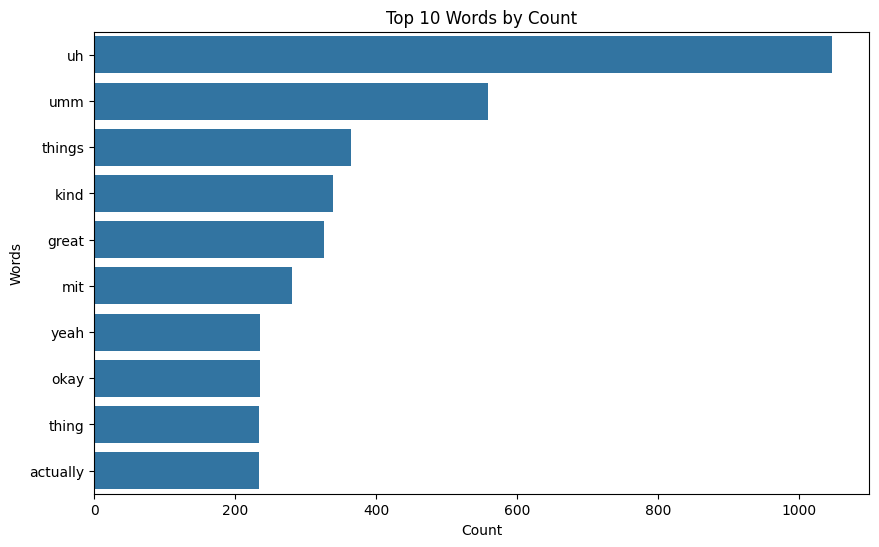

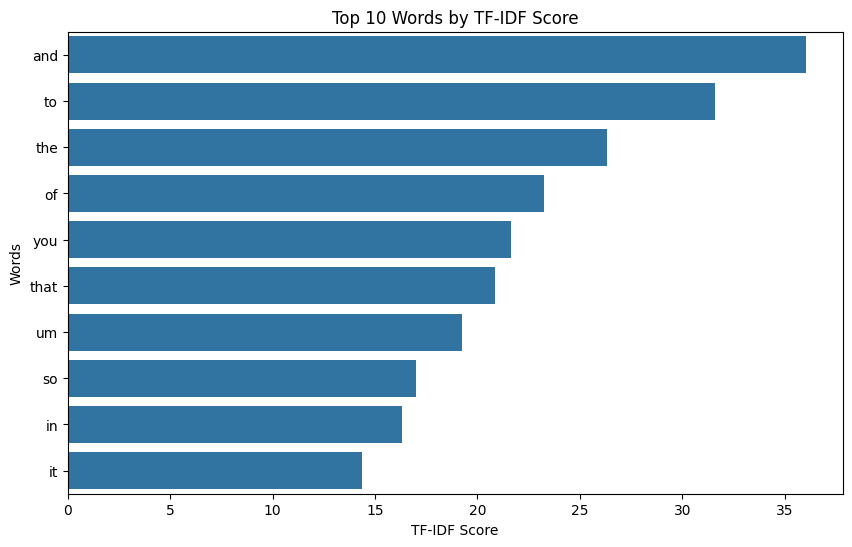

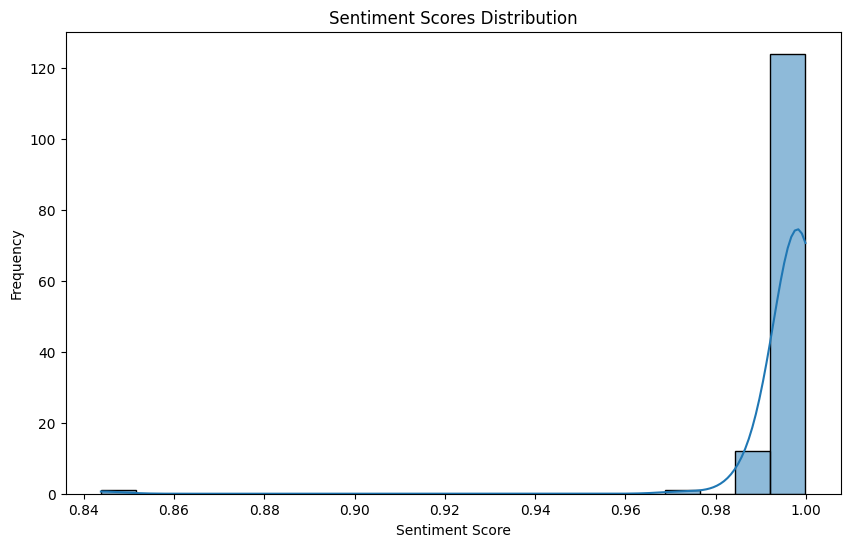

Count Vectorizer Matrix:
     000  10  100  13  14  15  16  18  20  200  ...  yep  yes  yo  yoga  york  \
0      1   0    0   0   0   0   0   0   0    0  ...    0    1   0     0     0   
1      0   0    0   0   0   0   0   0   0    0  ...    0    0   0     0     0   
2      0   0    0   0   0   0   0   0   0    0  ...    0    0   0     0     0   
3      0   0    0   0   0   0   0   0   0    0  ...    0    0   0     0     0   
4      0   0    0   0   0   0   0   0   0    0  ...    0    0   0     0     0   
..   ...  ..  ...  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ..   ...   ...   
133    0   0    0   0   0   0   0   0   0    0  ...    0    0   0     0     0   
134    0   0    0   0   0   0   0   0   0    0  ...    0    1   0     0     0   
135    1   0    0   0   0   0   0   0   0    0  ...    0    2   0     0     0   
136    0   0    0   0   0   0   0   0   0    0  ...    0    1   0     0     0   
137    0   0    0   0   0   0   0   0   0    0  ...    1    0   0     0     0   

  

In [ ]:
df = pd.read_csv('../Data/transcripts.csv', header=None, names=['Participant', 'Transcript'])

# Extracting syntactic features using CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english', min_df=2, max_df=0.8)
count_matrix = count_vectorizer.fit_transform(df['Transcript'])
count_df = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

# Extracting syntactic features using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=2, max_df=0.8)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Transcript'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Extracting semantic features using Vader sentiment analysis
analyzer = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Transcript'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Extracting advanced features using Word2Vec
sentences = [transcript.split() for transcript in df['Transcript']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
word2vec_vectors = [np.mean([word2vec_model.wv[word] for word in sentence if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for sentence in sentences]
word2vec_df = pd.DataFrame(word2vec_vectors)

# Plotting the top 10 words by count
top_10_words = count_df.sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_words.values, y=top_10_words.index)
plt.title('Top 10 Words by Count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()

# Plotting the top 10 words by TF-IDF score
top_10_tfidf_words = tfidf_df.sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_tfidf_words.values, y=top_10_tfidf_words.index)
plt.title('Top 10 Words by TF-IDF Score')
plt.xlabel('TF-IDF Score')
plt.ylabel('Words')
plt.show()

# Plotting sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment'], bins=20, kde=True)
plt.title('Sentiment Scores Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Displaying results
print("Count Vectorizer Matrix:")
print(count_df)

print("\nTF-IDF Vectorizer Matrix:")
print(tfidf_df)

print("\nSentiment Scores:")
print(df[['Participant', 'Sentiment']])

print("\nWord2Vec Embeddings:")
print(word2vec_df)

The TF-IDF score is calculated by multiplying the TF and IDF scores. This way, it balances the frequency of a word in a document with how unique it is across the entire corpus. The formula is:

$$ \text{TF-IDF}(t, d) = \text{TF}(t, d) \times \text{IDF}(t) $$

Where:

$t$ is the term (word)

$d$ is the document

$\text{TF}(t, d)$ is the term frequency of term $t$ in document $d$

$\text{IDF}(t)$ is the inverse document frequency of term $t$

In [7]:
print(count_vectorizer.vocabulary_)

{'interviewer': 2528, 'so': 4358, 'how': 2308, 'are': 331, 'you': 5299, 'doing': 1416, 'interviewee': 2526, 'im': 2363, 'pretty': 3650, 'good': 2067, 'ok': 3260, 'well': 5175, 'please': 3561, 'tell': 4717, 'me': 2919, 'about': 55, 'yourself': 5305, 'uhm': 4961, 'have': 2190, 'looked': 2805, 'at': 402, 'my': 3121, 'resume': 4009, 'or': 3304, 'should': 4255, 'alright': 233, 'guess': 2129, 'ah': 188, 'am': 241, 'course': 1130, 'here': 2234, 'which': 5197, 'is': 2566, 'computational': 986, 'biology': 567, 'its': 2577, 'mix': 3039, 'of': 3244, 'computers': 989, 'science': 4130, 'and': 268, 'actually': 108, 'thats': 4754, 'where': 5193, 'interest': 2502, 'lie': 2743, 'in': 2398, 'applying': 316, 'like': 2752, 'algorithmic': 210, 'kinda': 2648, 'software': 4368, 'engineering': 1594, 'too': 4845, 'datasets': 1211, 'dealing': 1222, 'with': 5230, 'genomics': 2029, 'some': 4379, 'that': 4753, 'activities': 104, 'do': 1405, 'out': 3329, 'side': 4272, 'school': 4125, 'include': 2405, 'camp': 709, '